Based on:

* http://nbviewer.ipython.org/github/ipython-books/cookbook-code/blob/master/notebooks/chapter06_viz/04_d3.ipynb

In [5]:
import pandas as pd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.readwrite import json_graph
import scipy.cluster.hierarchy as sph
%matplotlib inline

In [6]:
# może monte carlo graph?

In [7]:
seromap = pd.read_csv("../PDB_crystals_data_I/pdb_serotype_map.csv",
                      index_col='name').sero

In [8]:
seromap.head()

name
1eo8    H3N2
1hgd    H3N2
1hge    H3N2
1hgf    H3N2
1hgg    H3N2
Name: sero, dtype: object

In [9]:
seromap.unique()

array(['H3N2', 'H9N2', 'H1N1', 'H5N1', 'H2N2', 'H7N2', 'H7N3', 'H10N2',
       'H7N7', 'H16N3', 'H1N2', 'H17N10', 'H13N6', 'H7N9', 'H3N8'], dtype=object)

In [10]:
sero2num = {sero: i + 1 for i, sero in enumerate(seromap.unique())}

In [11]:
distances = pd.read_csv("../PDB_crystals_data_I/RMSD_shorted_crystals_tab.csv",
                 index_col='p_id')

In [12]:
distances.count().value_counts()

253    133
255     59
251     59
254      1
252      1
dtype: int64

In [13]:
distances.transpose().count().value_counts()

253    251
194      1
193      1
60       1
59       1
dtype: int64

In [14]:
distances.transpose().count()[distances.transpose().count() < 200]

p_id
2yp4     60
7       193
4fiu     59
8       194
dtype: int64

In [15]:
distances.shape

(255, 253)

In [16]:
set(distances.index) - set(distances.columns)

{'7', '8'}

In [17]:
new_index = distances.index.difference(distances.transpose().count()[distances.transpose().count() < 200].index)

In [18]:
distances = distances.ix[new_index, new_index]

In [19]:
distances.shape

(251, 251)

In [20]:
np.max(np.max(np.abs(distances - distances.transpose())))

0.0

In [21]:
tm_scores = pd.read_csv("../PDB_crystals_data_I/TMscore_shorted_crystals_tab.csv",
                        index_col='p_id')

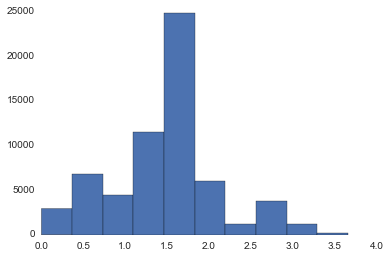

In [22]:
distances.stack().hist();

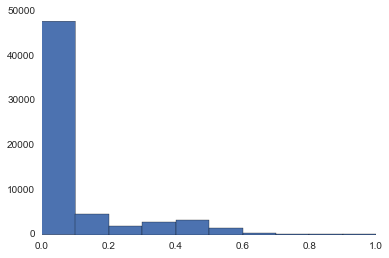

In [23]:
np.exp(-2 * distances).stack().hist();

In [24]:
np.exp(-2 * 0.4)

0.44932896411722156

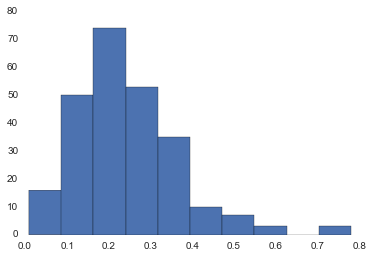

In [25]:
distances.applymap(lambda x: x if x > 0 else 999).min().hist();

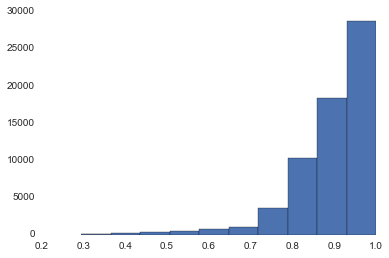

In [26]:
tm_scores.stack().hist();

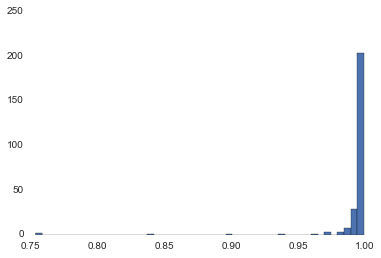

In [27]:
tm_scores.applymap(lambda x: x if x < 1 else -1).max().hist(bins=50);

In [28]:
distances.stack().count()

63001

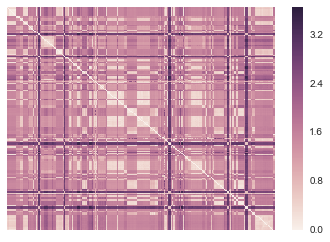

In [29]:
sns.heatmap(distances.values, xticklabels=False, yticklabels=False, linewidths=0);

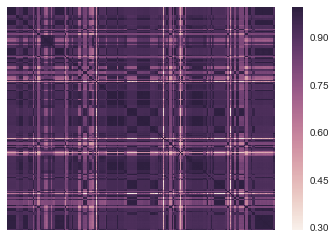

In [30]:
sns.heatmap(tm_scores.values, xticklabels=False, yticklabels=False, linewidths=0);

In [31]:
# sns.dendrogram(distances.values)
# kills kernel!

In [32]:
tm_smaller = tm_scores.ix[tm_scores.columns[:60],tm_scores.columns[:60]]

In [33]:
## it didnt kill, now it kills...
# sns.clustermap(tm_smaller);

In [34]:
## as well... why???
## same indices as for tm_smaller
# dist_str_sm = np.exp(-2. * distances).ix[tm_scores.columns[:60],tm_scores.columns[:60]]
# sns.clustermap(dist_str_sm);

In [35]:
#lin = sph.linkage(distances.values, method='single')
lin = sph.linkage(np.exp(-1 * distances.values), method='single')
# den = sph.dendrogram(lin, no_plot=True)
## = den['leaves']
new_order = sph.leaves_list(lin)

In [36]:
# isnt it possible to do it simpler
# distances_sorted = distances.values[new_order,:][:,new_order]
distances_sorted = distances.ix[new_order, new_order]

In [113]:
distances_sorted.to_csv("rmsd_cleaned.csv")

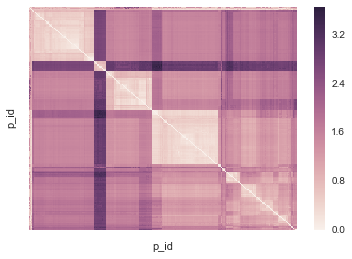

In [37]:
sns.heatmap(distances_sorted,
            xticklabels=False, yticklabels=False, linewidths=0);

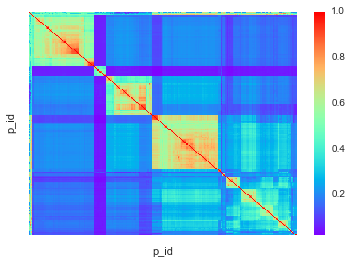

In [38]:
sns.heatmap(np.exp(-1 * distances_sorted),
            xticklabels=False, yticklabels=False, linewidths=0, cmap=plt.cm.rainbow);

In [82]:
mat = np.exp(-1.5 * distances_sorted.values)  # or different factor
norm = np.diag(mat.sum(axis=0)**(-1/3))  # or different factor (interval [-1/2, 0])
matn = np.dot(np.dot(norm, mat), norm)

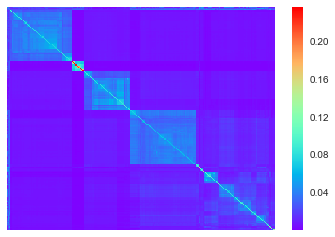

In [83]:
sns.heatmap(matn,
            xticklabels=False, yticklabels=False, linewidths=0, cmap=plt.cm.rainbow);

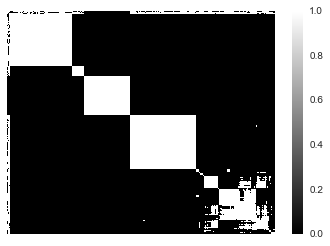

In [84]:
sns.heatmap(matn > 0.02,
            xticklabels=False, yticklabels=False, linewidths=0, cmap=plt.cm.gray);

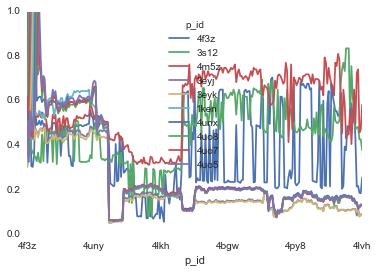

In [40]:
np.exp(-1 * distances_sorted).head(10).transpose().plot()

In [41]:
np.exp(-1 * distances_sorted).mean(axis=1).head()

p_id
4f3z    0.381978
3s12    0.455731
4m5z    0.570519
3eyj    0.218502
3eyk    0.212494
dtype: float64

In [42]:
distances_sorted.mean(axis=1).head()

p_id
4f3z    1.100478
3s12    0.851355
4m5z    0.599004
3eyj    1.707092
3eyk    1.733386
dtype: float64

In [43]:
distances_sorted.mean(axis=1).order().head()

p_id
4m5z    0.599004
3s12    0.851355
4f3z    1.100478
4bgz    1.174661
4bh0    1.176574
dtype: float64

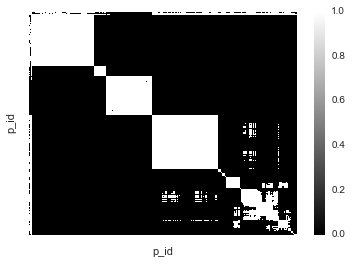

In [44]:
sns.heatmap(np.exp(-2 * distances_sorted) > 0.15,
            xticklabels=False, yticklabels=False, linewidths=0, cmap=plt.cm.gray);

In [45]:
# sns.heatmap(distances_sorted - distances_sorted.mean(),
#             xticklabels=False, yticklabels=False, linewidths=0);

In [46]:
def get_sero_num(name):
    if name in seromap:
        return sero2num[seromap[name]]
    else:
        return 0

In [47]:
get_sero_num("1hge")

1

In [48]:
seromap.get('1hgex')

In [49]:
g = nx.from_numpy_matrix(np.exp(-2 * distances).values)
# g = nx.Graph([(u, v, d) for u, v, d in g.edges(data=True) if d['weight'] > 0.1]) # u != v and
# the above gives not json serializable stuff (??)

In [50]:
# sns.heatmap(distances_sorted - distances_sorted.mean(),
#             xticklabels=False, yticklabels=False, linewidths=0);

In [51]:
for i, p_id in enumerate(new_index):
    g.node[i] = {'p_id': p_id,
                 'sero': seromap.get(p_id, "H?N?"),
                 'sero_num': get_sero_num(p_id)}

In [52]:
sero_pid = pd.DataFrame([v for k, v in g.nodes(data=True)])

In [112]:
sero_pid.to_csv("pid_sero.csv", index=False)

In [53]:
sero_pid.query("sero == 'H?N?'").to_csv("brakujace.csv", index=False)

In [54]:
len(sero_pid.query("sero == 'H?N?'"))

67